In [1]:
%matplotlib inline
import ROOT
import numpy as np
import landau
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from NotebookUtils.ProgressBar import LogProgress as lp
from root_numpy import hist2array, root2array
plt.rcParams['font.family']='serif' 
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14

def hist2myarray(histo):
    array = [[],[],[]]
    n = histo.GetNbinsX()
    for i in range(n):
        array[0].append(histo.GetBinLowEdge(i+1))
        array[1].append(histo.GetBinContent(i+1))
    return array

def twohist2myarray(histo):
    nx = histo.GetNbinsX()
    ny = histo.GetNbinsY()
    array = [np.empty([nx]),np.empty([ny]),np.empty([nx,ny])]
    for i in range(nx):
        array[0][i] = histo.GetXaxis().GetBinLowEdge(i+1)
    for j in range(ny):
        array[1][j] = histo.GetYaxis().GetBinLowEdge(j+1)
    for i in range(nx):
        for j in range(ny):
            array[2][i][j] = histo.GetBinContent(i+1,j+1)
    return array

def fit(array,function):
    try:
        popt, pcov = curve_fit(function,array[0],array[1])
        chi = chisquare(array[1],function(array[0],*popt),ddof=len(array[0])-len(popt))
    except RuntimeError:
        popt = [0,0,0,0]
        pcov = 0
        chi = [0,0]
    return popt, pcov, chi


# General settings
col = ['r','g','b']
titles = ['U plane','V plane','Y plane']
subName = ['Track Hits','PFPart Hits','All (other) Hits']

# Case settings
fileNames = ['MC_MCC7_histoFile_Tracy_AnaOnly_2.08_2.08_2.6.root',
             'Data_MCC7_histoFile_Tracy_AnaOnly_2.08_2.08_2.6.root',
#              'MC_MCC8_histoFile_Tracy_AnaOnly_2.08_2.08_2.6.root',
             'Data_MCC8_histoFile_Tracy_AnaOnly_2.08_2.08_2.6.root']
fileTypes = ['MC [MCC7]',
             'Data [MCC7]',
#              'MC [MCC8]',
             'Data [MCC8]']
sub = 0

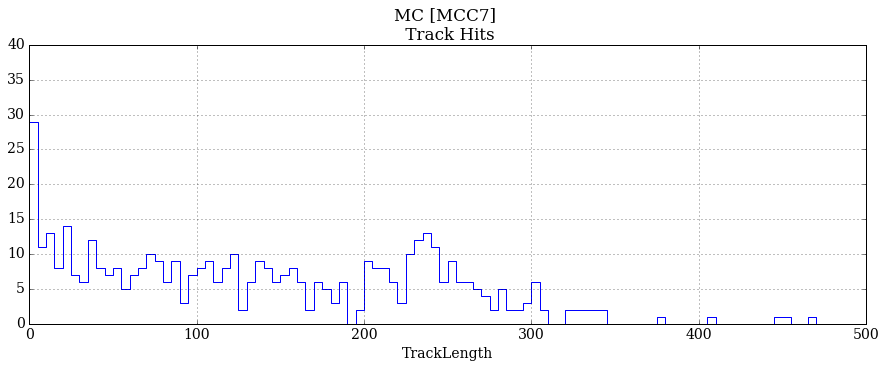

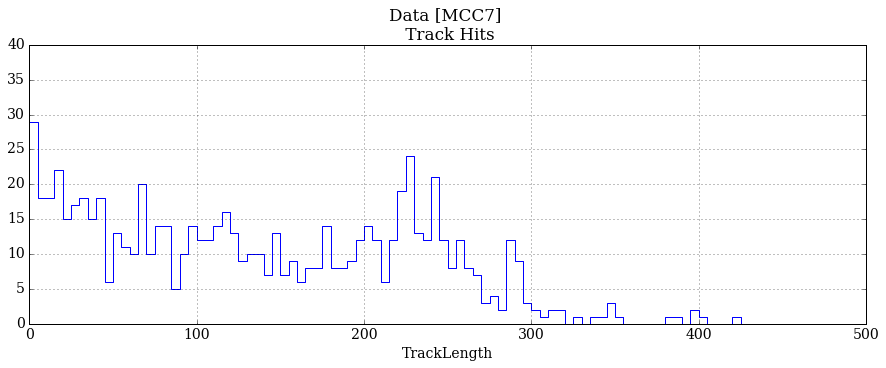

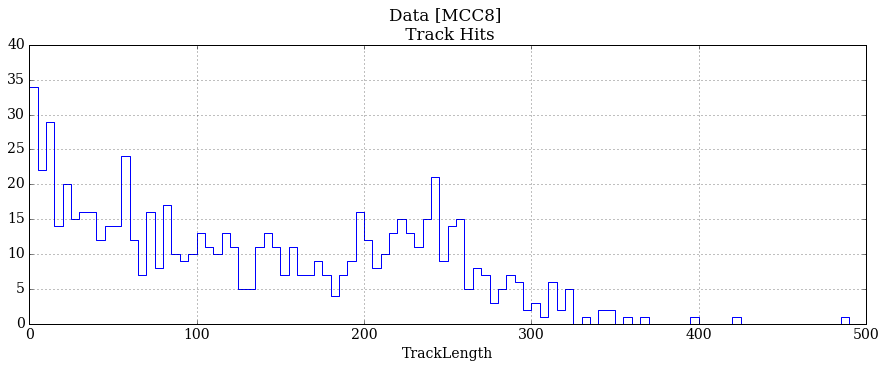

In [25]:
# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'TrackLength'
titles = ['U plane','V plane','Y plane']
xlab = 'TrackLength'
xLim = [0,10]
sub = 0

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    arr = hist2myarray(rootSub[sub].Get(histoName))
    plt.plot(arr[0],arr[1],color='b',lw=1,drawstyle='steps')
    plt.title('%s \n %s' %(fileType,subName[sub]))
    plt.xlabel(histoName)
    plt.ylim(0,40)
    plt.grid(True)
        
for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)

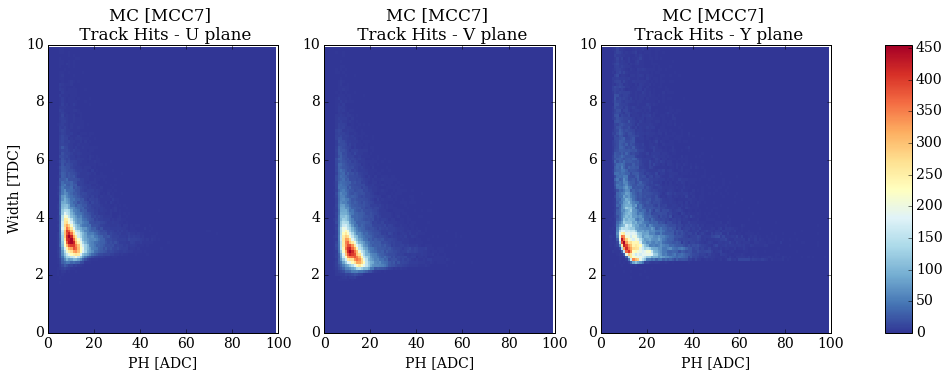

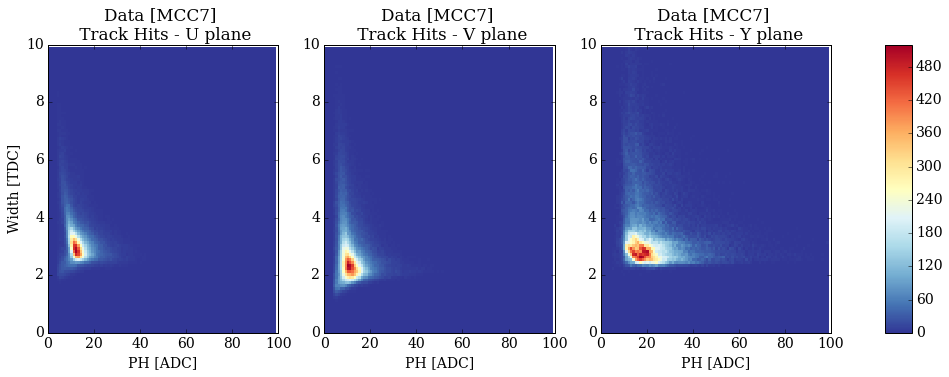

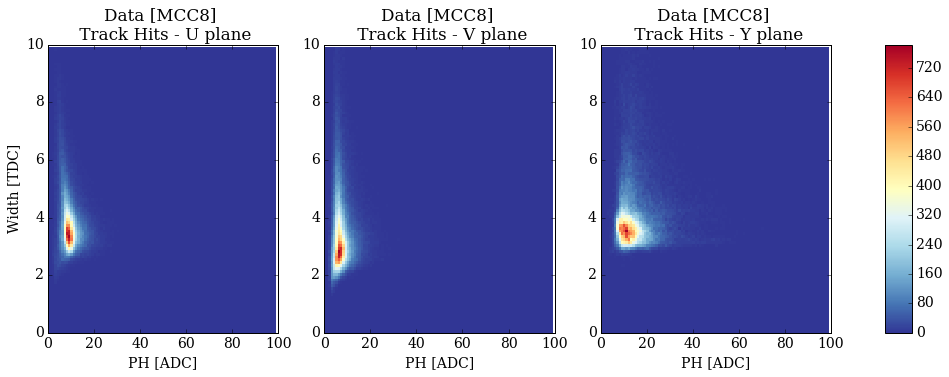

In [2]:
def PlotPhWidth(fileType,fileName,sub):
    # Settings
    histoName = 'PHVsWidth'
    xlab = 'PH [ADC]'
    ylab = 'Width [TDC]'
    # norm=LogNorm()

    # Execution
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        arr = twohist2myarray(rootSub[sub].Get(histoName+'%i' %plane))
        fig[plane] = canv.add_subplot(131+plane)
        plt.pcolormesh(arr[0],arr[1],arr[2].T,cmap='RdYlBu_r')
        plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
        plt.xlabel(xlab)
#         plt.clim(0,150)

    fig[0].set_ylabel(ylab)
    plt.subplots_adjust(bottom=0.1, right=0.85, top=0.9)
    cax = plt.axes([0.9, 0.1, 0.025, 0.8])
    plt.colorbar(cax=cax)   
    plt.show()
    
for fileType,fileName in zip(fileTypes,fileNames):
    PlotPhWidth(fileType,fileName,sub)

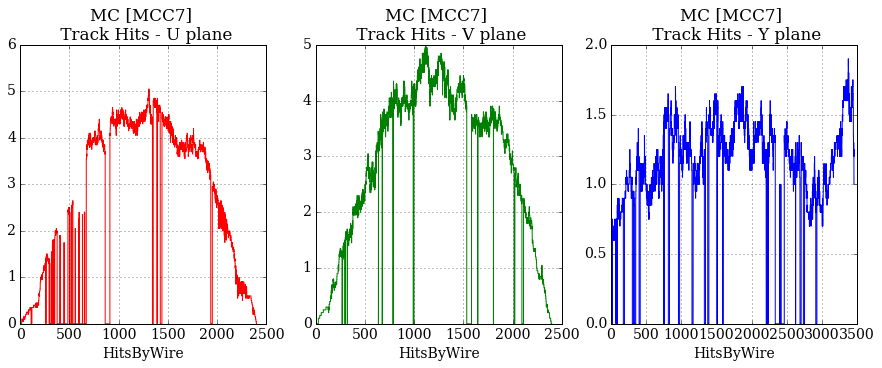

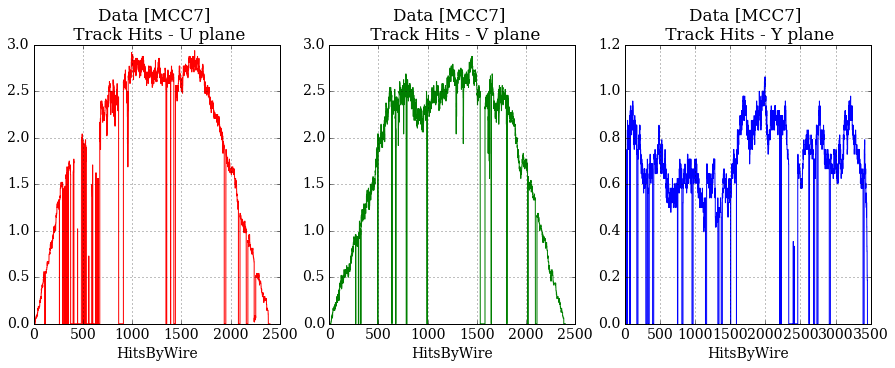

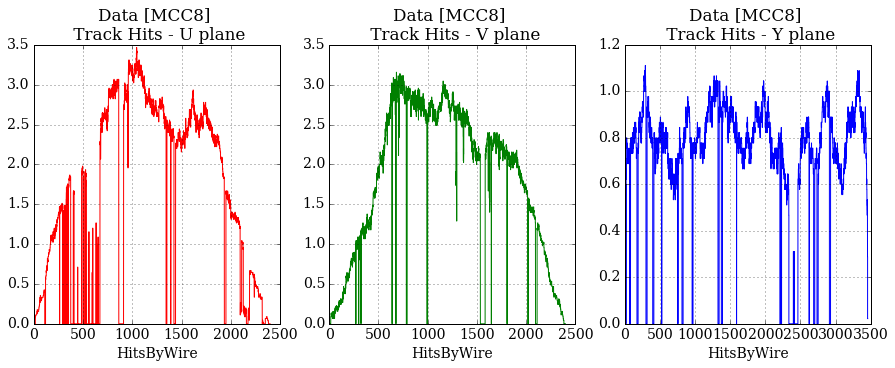

In [11]:
# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'HitsByWire'
titles = ['U plane','V plane','Y plane']
xlab = 'Charge'
xLim = [0,10]
sub = 0

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        arr = hist2myarray(rootSub[sub].Get(histoName+'%i' %plane))
        dof = len(arr[0])-4
        fig[plane] = canv.add_subplot(131+plane)
        plt.plot(arr[0],arr[1],color=col[plane],lw=1,drawstyle='steps')
        plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
        plt.xlabel(histoName)
#         plt.xlim(xLim)
        plt.grid(True)
        
for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)

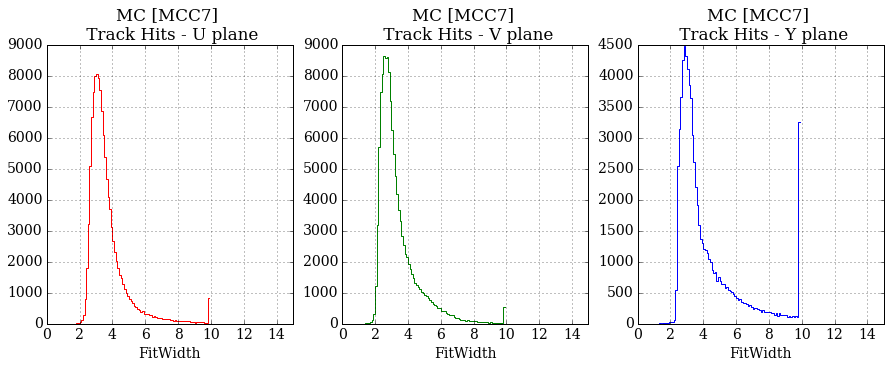

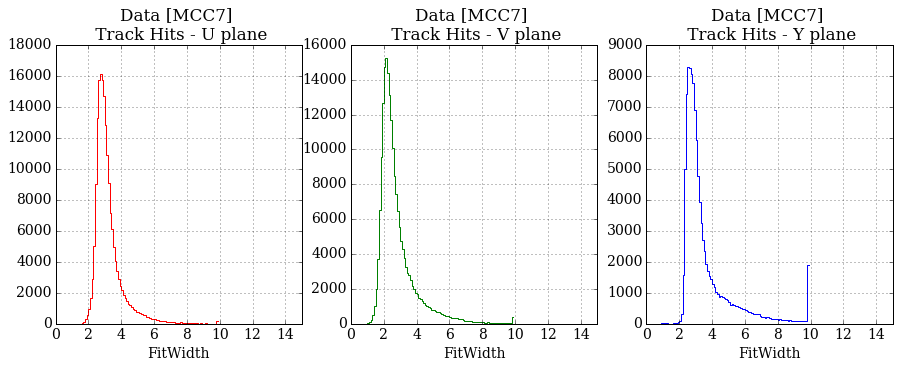

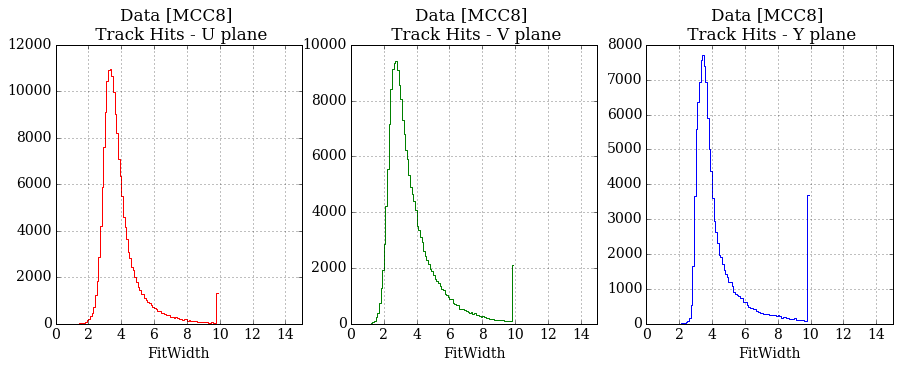

In [26]:
# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'FitWidth'
titles = ['U plane','V plane','Y plane']
xlab = 'Charge'
xLim = [0,15]
sub = 0

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        arr = hist2myarray(rootSub[sub].Get(histoName+'%i' %plane))
        dof = len(arr[0])-4
        fig[plane] = canv.add_subplot(131+plane)
        plt.plot(arr[0],arr[1],color=col[plane],lw=1,drawstyle='steps')
        plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
        plt.xlabel(histoName)
        plt.xlim(xLim)
        plt.grid(True)
        
for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)

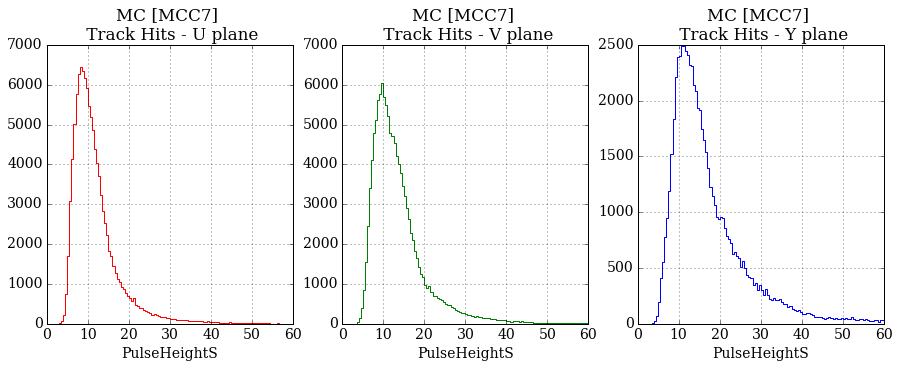

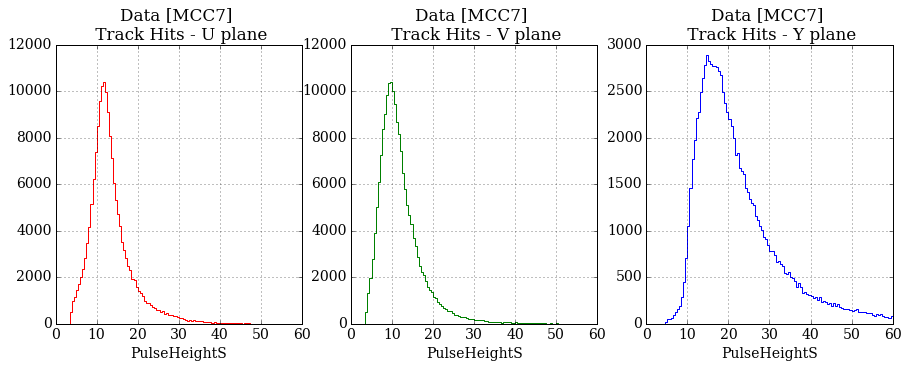

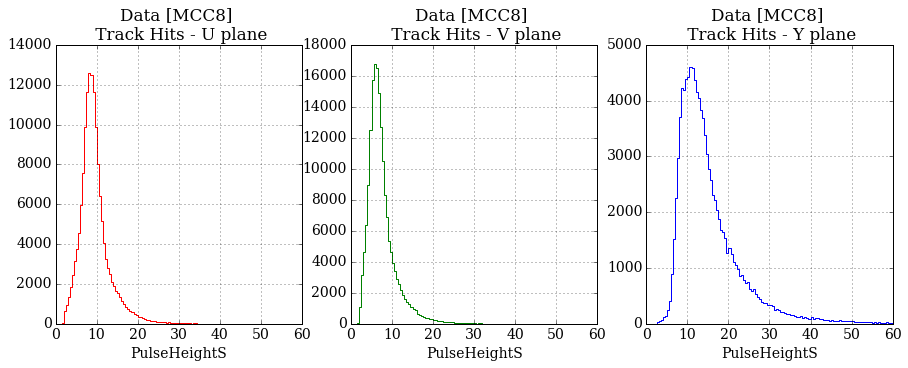

In [27]:
# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'PulseHeightS'
titles = ['U plane','V plane','Y plane']
xlab = 'Charge'
xLim = [0,60]

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        arr = hist2myarray(rootSub[sub].Get(histoName+'%i' %plane))
        dof = len(arr[0])-4
        fig[plane] = canv.add_subplot(131+plane)
        plt.plot(arr[0],arr[1],color=col[plane],lw=1,drawstyle='steps')
        plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
        plt.xlabel(histoName)
        plt.xlim(xLim)
        plt.grid(True)
        
for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)

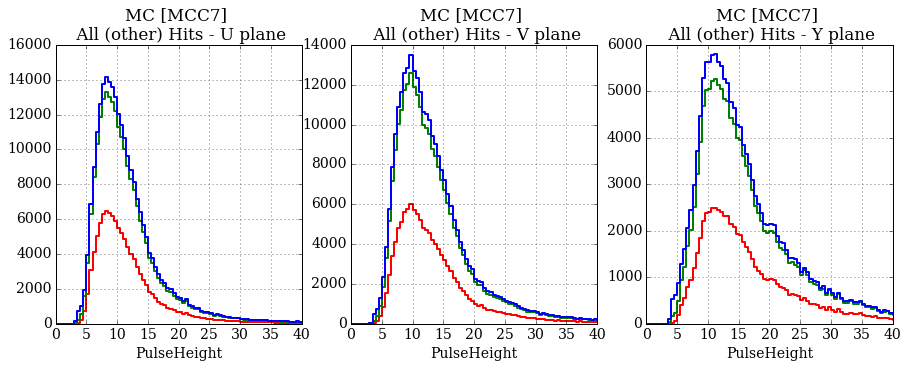

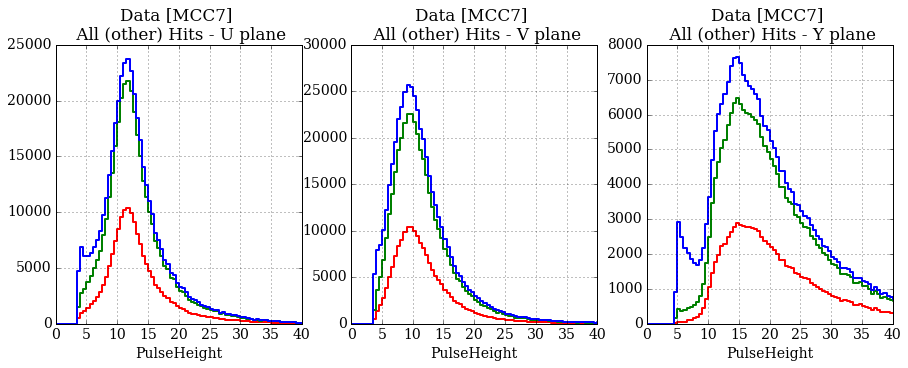

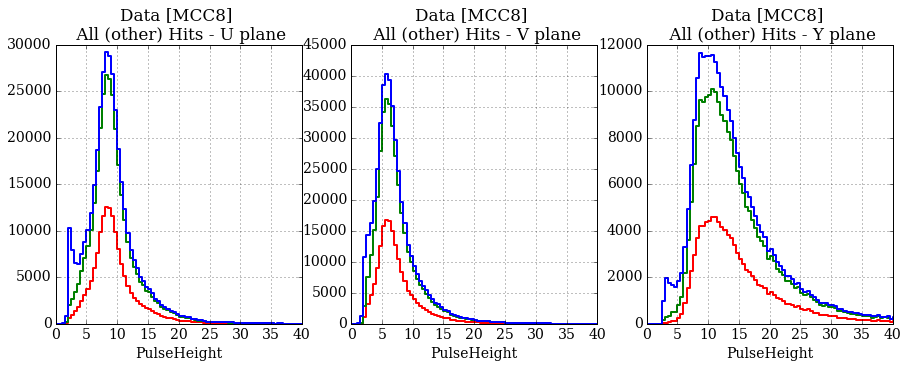

In [13]:
# Stacked histogram like plots

# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'PulseHeightS'
titles = ['U plane','V plane','Y plane']
xlab = 'PulseHeight'
xLim = [0,40]

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    dummy = [[],[],[]]
    arr = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        fig[plane] = canv.add_subplot(131+plane)
        for sub in range(3):
            arr[sub] = np.array(hist2myarray(rootSub[sub].Get(histoName+'%i' %plane)))
            if sub>0: arr[sub][1] = np.add(arr[sub][1],arr[sub-1][1])
            fig[plane].plot(arr[0][0],arr[sub][1],color=col[sub],lw=2,drawstyle='steps')
        plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
        plt.xlabel(xlab)
        plt.legend()
        plt.xlim(xLim)
        plt.grid()
        plt.legend(fontsize='small')
        
for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)

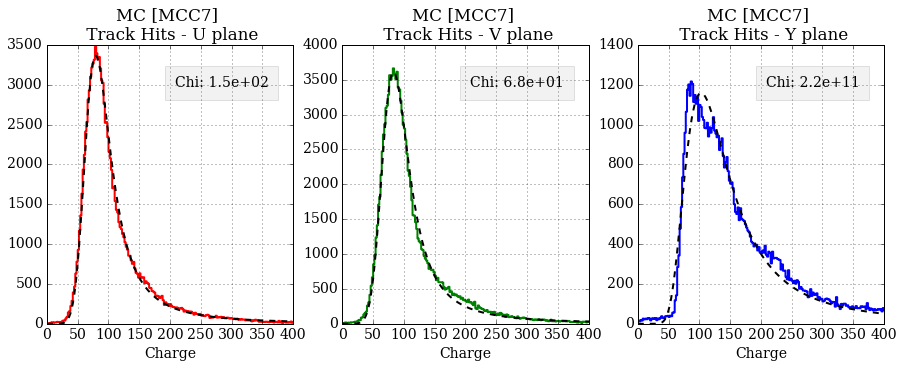

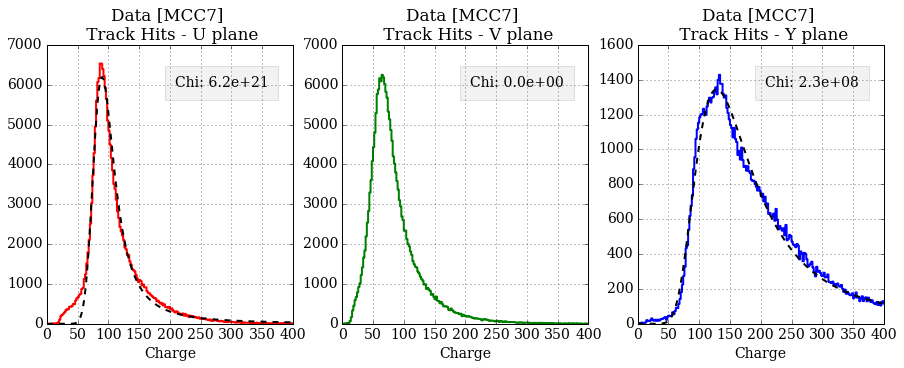

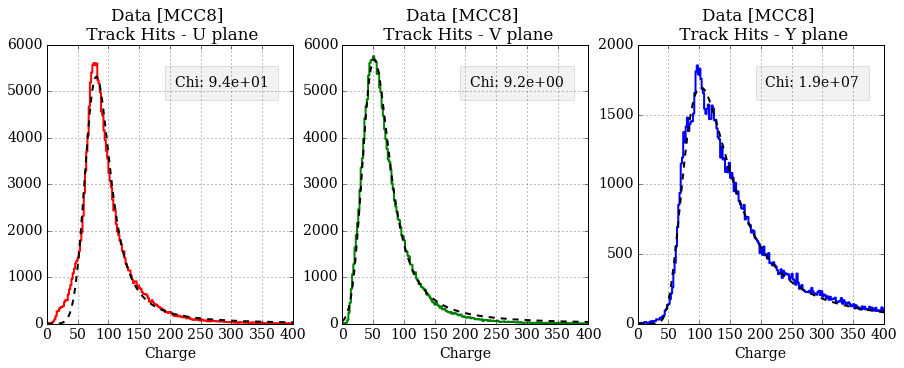

In [7]:
# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'HitCharge'
titles = ['U plane','V plane','Y plane']
xlab = 'Charge'
xLim = [0,400]

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        for sub in range(1):
            arr = hist2myarray(rootSub[sub].Get(histoName+'%i' %plane))
            popt, pcov, chi = fit(arr,landau.gauss_landau)
            dof = len(arr[0])-4
            fig[plane] = canv.add_subplot(131+plane)
            plt.plot(arr[0],arr[1],color=col[plane],lw=2,linestyle='steps')
            plt.plot(arr[0],landau.gauss_landau(arr[0],*popt),linewidth=2,linestyle='--',color='black')
            plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
            plt.xlabel(xlab)
            plt.xlim(xLim)
            plt.grid(True)
            fig[plane].text(0.9,0.85,'Chi: %.1e' %(chi[0]/float(dof)),horizontalalignment='right',transform=fig[plane].transAxes,bbox={'facecolor':'gray','alpha':0.1,'pad':10})
            
for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)

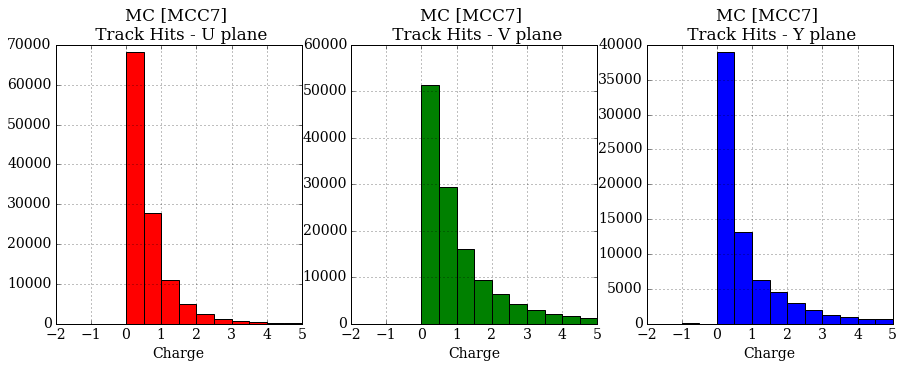

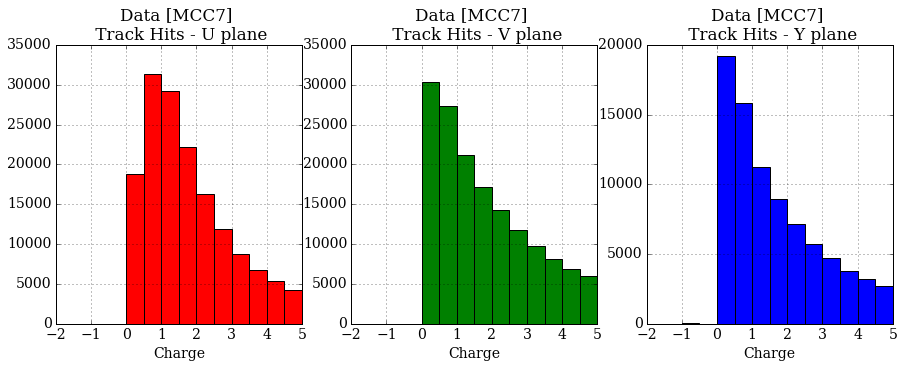

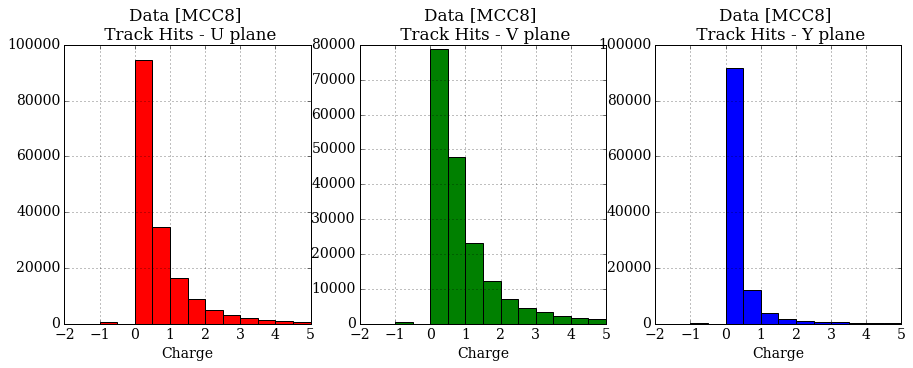

In [9]:
# Settings
col = ['r','g','b']
subName = ['Track Hits','PFPart Hits','All (other) Hits']
histoName = 'Chi2DOF'
titles = ['U plane','V plane','Y plane']
xlab = 'Charge'
xLim = [-2,5]

# Execution
def Plot(fileType,fileName,sub):
    rootSub = [[],[],[]]
    rootFile = ROOT.TFile(fileName,'READ')
    rootDir = rootFile.Get('TrackHitAna')
    rootSub[0] = rootDir.Get('FitTrackHits')
    rootSub[1] = rootDir.Get('PFPartHits')
    rootSub[2] = rootDir.Get('AllHits')

    fig = [[],[],[]]
    canv = plt.figure(figsize=(15,5))
    for plane in range(3):
        arr = hist2myarray(rootSub[sub].Get(histoName+'%i' %plane))
        fig[plane] = canv.add_subplot(131+plane)
        plt.bar(arr[0],arr[1],arr[0][2]-arr[0][1],color=col[plane])
        plt.title('%s \n %s - %s' %(fileType,subName[sub],titles[plane]))
        plt.xlabel(xlab)
        plt.xlim(xLim)
        plt.grid(True)

for fileType,fileName in zip(fileTypes,fileNames):
    Plot(fileType,fileName,sub)